```
`# This is formatted as code`
```

# 🐶End-to-End Multi-class Dog Breed Classification
This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and Tensorflow Hub.

## 1. Problem
The problem is, there are 120 breeds of dogs, Identifying the breed of a dog, giving the image of the dog.
> When i'm sitting at a cafe and i take a photo of a dog, i want to know what breed of dog it is. Could my machine learning model i'm building be able to tell me?

## 2. Data
The data we are using is from kaggle's dog breed identification competition.    https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file eith prediction probabilities of each dog breed of each test image.    https://www.kaggle.com/competitions/dog-breed-identification/overview

## 4. Features
* We're dealing with image (unstructured data) so it's probably best we use Deep learning and transfer learning. (which is what this project is all about).
* There're 120 breeds of dogs (this means there 120 different classes). This means if there were only 2 breeds it'll be Binary classification (e.g our heart disease project) whether someone has disease or not.

* There are around 10,000 + images in the training set (These images have labels)
* There are around 10,000 + images in the test set (These images have no lables because we want to predict them).



In [ ]:
## Unzip the uploaded data from google drive
##  !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision"

***Getting our work space ready***
* Import TensorFlow 2.18.0 ✅
* Import Tensorflow Hub ✅
* Make sure are using a GPU ✅

In [ ]:
## Import Neccessory Tools into colab
import tensorflow as tf
import tensorflow_hub as hub
## Import Neccessory Tools into colab
import tensorflow as tf
import tensorflow_hub as hub
## Check for avalable version
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)
## Check for GPU Aavailability
print("GPU", "availability (YESSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")
print("GPU", "availability (YESSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.18.0
TF Hub version: 0.16.1
GPU availability (YESSS!!!!!)
GPU availability (YESSS!!!!!)


## Getting our data ready (Turning into Tesnors)
With all machines learning models, our data has to be in numerical format. so that's what we'll be doing first. Turning our images into Tensors (Numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
## Check out the labels of our data. !st we need import pandas.

import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
## How many labels are there of each breed?
labels_csv["breed"].value_counts() ## to count the values in this breed column

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

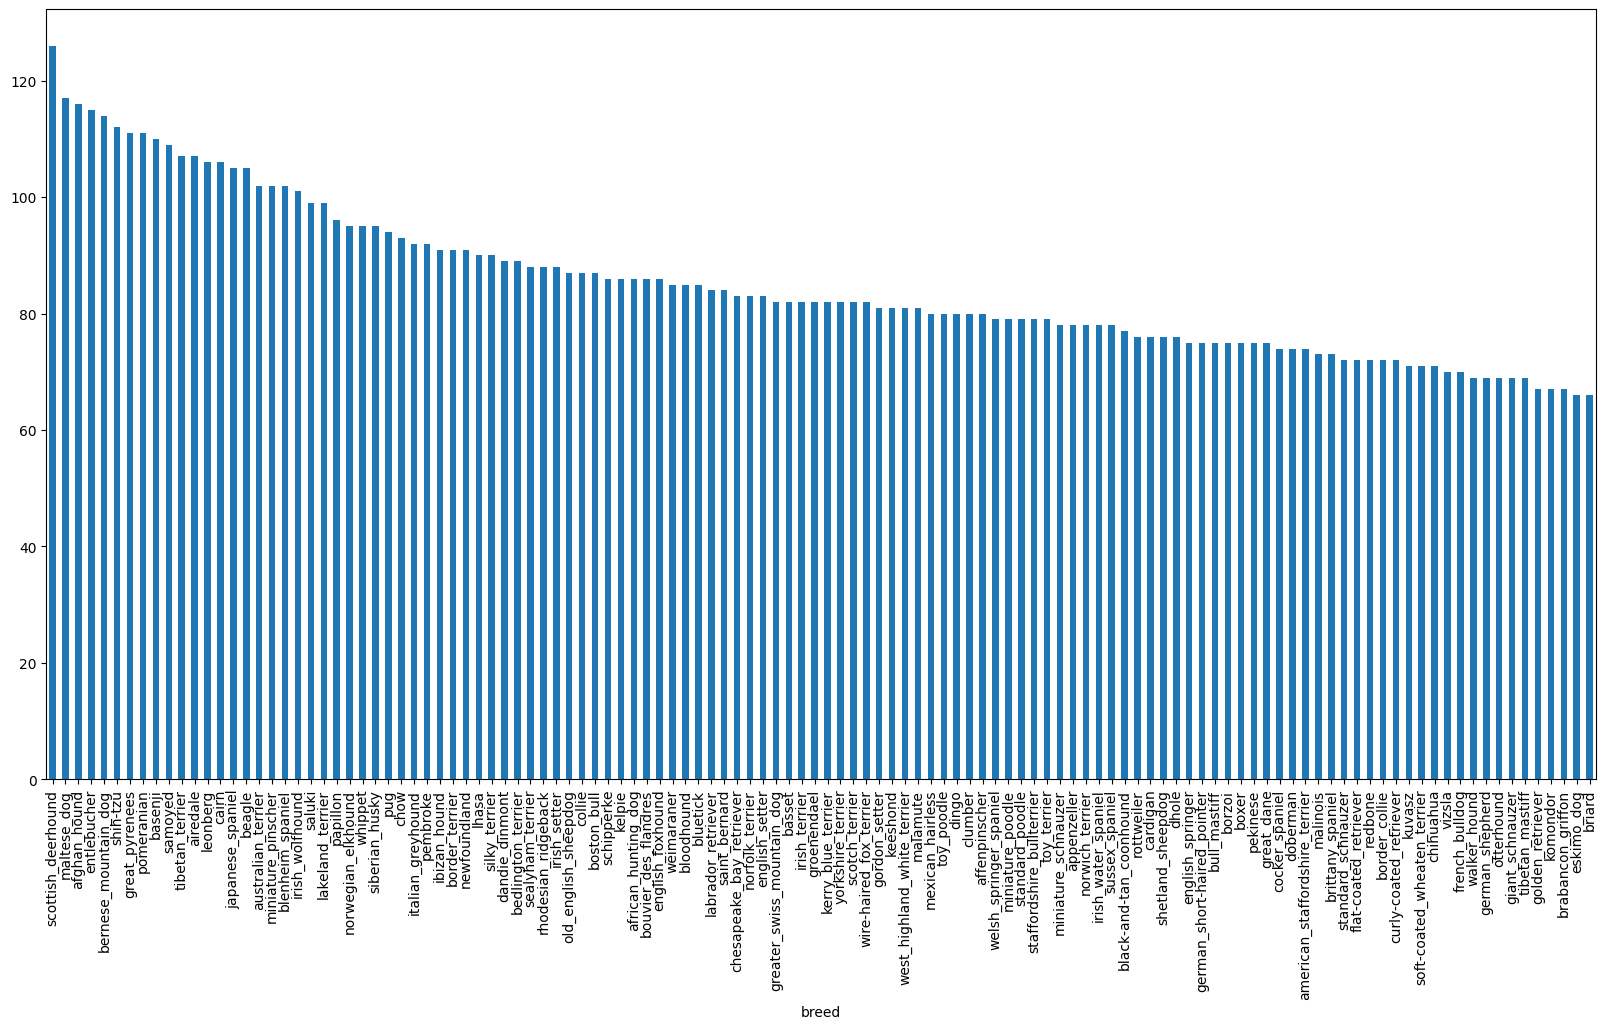

In [ ]:
## Let's visualize this
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

This is cooll.. One good thing about Google colab id that you don't need into import matplotlib

In [ ]:
## How do we fine the mean of the column. we need to count them 1st. Let's use the median
labels_csv["breed"].value_counts().median()

82.0

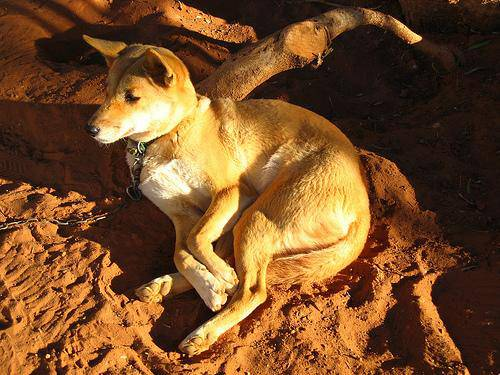

In [ ]:
## Let's view an image
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their file names.
Let's get a list of all our images pathnames together.

In [ ]:
## Create pathnames from image ID's
filenames = [fname for fname in labels_csv["id"]]
## Check the 1st 10
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
## Let's make it a file pathways as it in our drive.
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
## Check the 1st 15
filenames[:15]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/My Drive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/My Drive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/My Drive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/My Drive/Dog Vision/train/006cc3ddb9dc1bd82

In [ ]:
## Check if number of filename matches number of actual image file (from kaggle)
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match acutal amount of files!!! proceed.")
else:
  print("Filename do not match actual amount of files, check the target directory.")

Filename do not match actual amount of files, check the target directory.


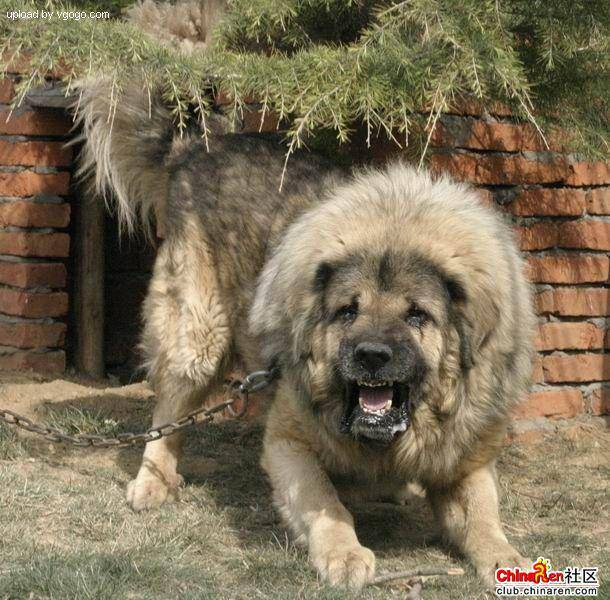

In [ ]:
## One more check. Dog image
Image(filenames[9000])

In [ ]:
## Check dog breed.
labels_csv["breed"][9000]

'tibetan_mastiff'

**Since we've now got our training image filepath in a list, let's prepare our labels**

In [ ]:
## Let's create a variable for label csv for breed
labels = labels_csv['breed']
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
## TO do this we have to turn labels into numbers.
## let's import numpy and view it in numpy array

import numpy as np
labels = labels_csv["breed"]. to_numpy()
labels
## another way to do it is. labels = np.array(labels) does same thing as above.
## labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
## lenght of our labels
len(labels)

10222

In [ ]:
## Let's check if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("number of labels matches number of filenames!")
else:
  print("number of labels does not match number of filenames, check data directories")

number of labels matches number of filenames!


In [ ]:
## Let's fine the unique labels
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
## Turn a single unoque label into array of boolean (i.e True or False)
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
## Turn every labels(all labels) into array of boolean or boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
## Let's turn the booleans into numbers
print(labels[0]) ## original labels
print(np.where(unique_breeds == labels[0])) ## i.e index where label ocures
print(boolean_labels[0].argmax()) ## index where label occures in boolean_array
print(boolean_labels[0].astype(int)) ## There will be a 1 where the sample label occures

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


**Creating our own Validation Set**.

Since the dataset from kaggle doesn't come Validation set, we're going to create our own.

In [ ]:
## Let's set up x and y variables
x = filenames
y = boolean_labels

Since we are working with over 10,000 filenames, it's a good idea to start working with a portion of them first. to make sure it's working before we go on training on all of them. It's for any other project for own good, when doing expriments. The goal is to minimized the time, so as to figure out what works and whats doesn't.

Now we are going to start experimenting with 1000 images and increase as needed.

In [ ]:
## Let's set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000}

In [ ]:
## Let's split our data into train and validation set.
from sklearn.model_selection import train_test_split

## Split them into training and validation of total size NUM_MGAES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

## Just to check if all the lenghts of our data are still correct
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
## Let's have a guess at the the training data
x_train[:3], y_train[:3]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,

## *Preprocessing Images (Turning images into Tensors)*

To preproccesses our images into tensors we're ging to write a function which does a few things: (These process apply to all other filepath in any project, it can Audio file, image file, email addresses, vidoe file etc. We use tensors to process b4 training and validation)

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable
3. Turn our images '(jpg)' into Tensors. (applicable for other filepath in Audio, vidoe, emails addresses, etc).
4. Normallize our images (conver color channel values from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 244). All images to be resized and reshaped as sam3. (bcos all images are not the same size and shapes)
6. Returned the modifield image.


B4 we do let's see what importing an image looks like

In [ ]:
## Coverting an image into numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

257 is height, shape 350 (this is why we need to reshape them, while 3 is the colour channel (e.g. red, blue and white) it can be more than 3 colors.

images colors are arrange in RGB (reb, green and blue) and they range from 0 - 255

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
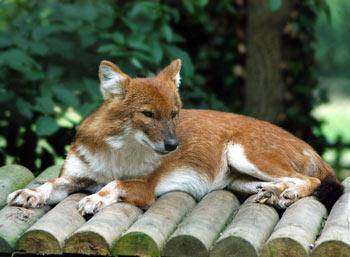

In [ ]:
## Let's take on our image which numpy array
image

The value is 0 - 255

In [ ]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

That's it.. red, green and blue picks up values btwn 0 - 255

In [ ]:
## Let's turn our image into a tensors. You can turn anything into a tensor by using tf.onstant
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

We got the exact same values as in numpy array. but the only difference here is that our images are now in tensor, of shape 2, 350, 3. now we are in Tensorflow and can be able to run perfectly in GPU.

In [ ]:
## Let's create a function for preproccessing image.
## !st let's Define Image
IMG_SIZE = 224

## Function
def process_image(image_path, img_size=IMG_SIZE):
  """
  Take the image file path and turn the image into a tensor.
  """
  ## Read an image file
  image = tf.io.read_file(image_path)

  ## N0 3. Turn the jpeg image into numerical Tensor with 3 colour channels (Red,Green and Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  ## N0 4. Convert the color channel values of the image from 0-255 to 0-1 values.
  image = tf.image.convert_image_dtype(image, tf.float32)

  ## Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turnung our Data into Batches.

*Whyturn our data in batches*?

We have 10,000+ images in our dataset.. if you're trying to process 10000+ images in one go, they will all might ot fit into memory. But if take a batch of 32, after that another 32, our model can fit in 10,000+ perfectly. A GPU also have limited amount of memory depending on your computer google drive.

So that's why we do about 32 (this is the batch size) images at a time, (you can manually ajust the batch size if need be).

In other to use Tensowflow effectively, we need our data in the form of, Tensor Turples which looks like this: `(image, label)`. (our machine learning will figuree out parterns that relate this image and there labels with loop function untill it get through the 10,000+ images in our dataset.





In [ ]:
## Create a function that returns a turple of tensors in our (image, label)
def get_image_label(image_path, label):
  """
  Take an image file path name and the associated label,
  process the image and return a turple of (image, label).
  """
  image = process_image(image_path)
  return(image, label)

In [ ]:
 ## Demo of the above. in this demo x is representing our 10,000+ images and y representing our Labels.
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've gpt sa way to turn our data into turple of tensors in the form of(images, label). Let's make a function to turn all of our data (x, y) into batches

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [ ]:
## Define the batche size.. 32 is a good start.
BATCH_SIZE = 32

## Create a function to data into batches.
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  ## If the data is a test dataset, we probably don'y have the labels.
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) ## 0nly filenames has no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  ## If the data is a valid datset, we don't need to shuffle it.
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    ## Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    ## Shuffling pathnames and labels before mapping image processor function is faster than shuffling images.
    data = data.shuffle(buffer_size=len(x))

    ## Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    ## Now let's turn the training data into batches
    data_batch = data.batch(BATCH_SIZE) # Fixed: Removed extra data_batch.batch
    return data_batch

In [ ]:
## let's test our function by creating training and validation data batches.
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


**Visualizing Data Batches**

Our data is now in batches, however this can be a little hard to umderstand/comprehend, let's visualize them

In [ ]:
import matplotlib.pyplot as plt

## Create a function for viwing images in a data batch.
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  ## Setup the figure
  plt.figure(figsize=(10, 10))

 ## Set up figure..
  plt.figure(figsize=(10, 10))

 ## Then loop  through 25 f(or diplayimg 25 images)
  for i in range(25):
   ## Create subplots (5 rows, 5 columns)
   ax = plt.subplot(5, 5, i+1)
   ## Display an image
   plt.imshow(images[i])
   ## Add the image label as the title
   plt.title(unique_breeds[labels[i].argmax()])
   ## Turn the grid lines off.
   plt.axis("off")


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

<Figure size 1000x1000 with 0 Axes>

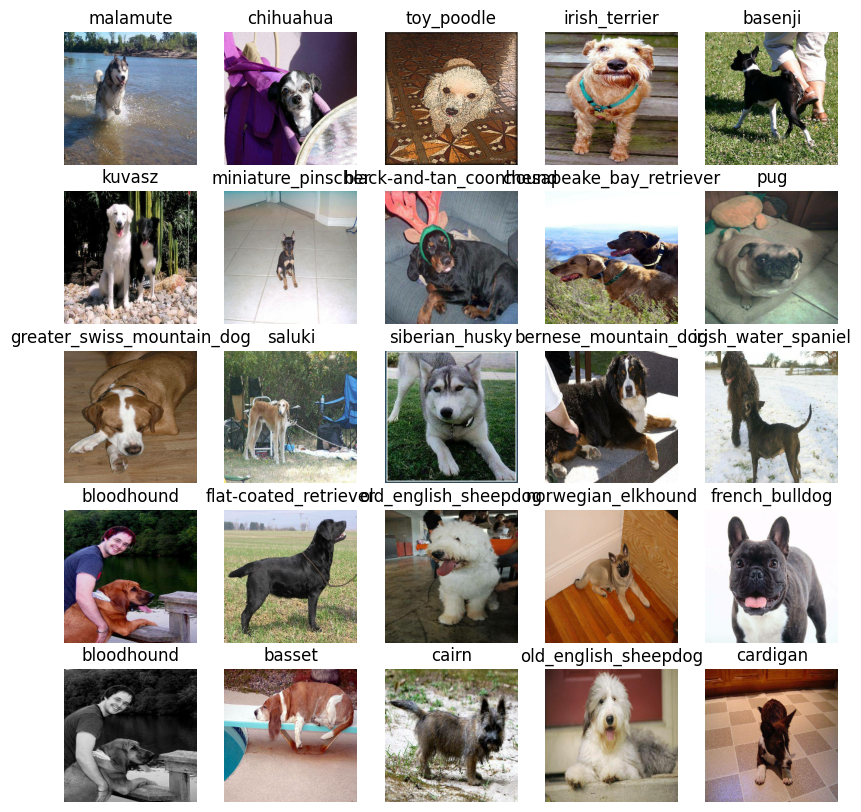

In [ ]:
## let's visualize the data in our training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

<Figure size 1000x1000 with 0 Axes>

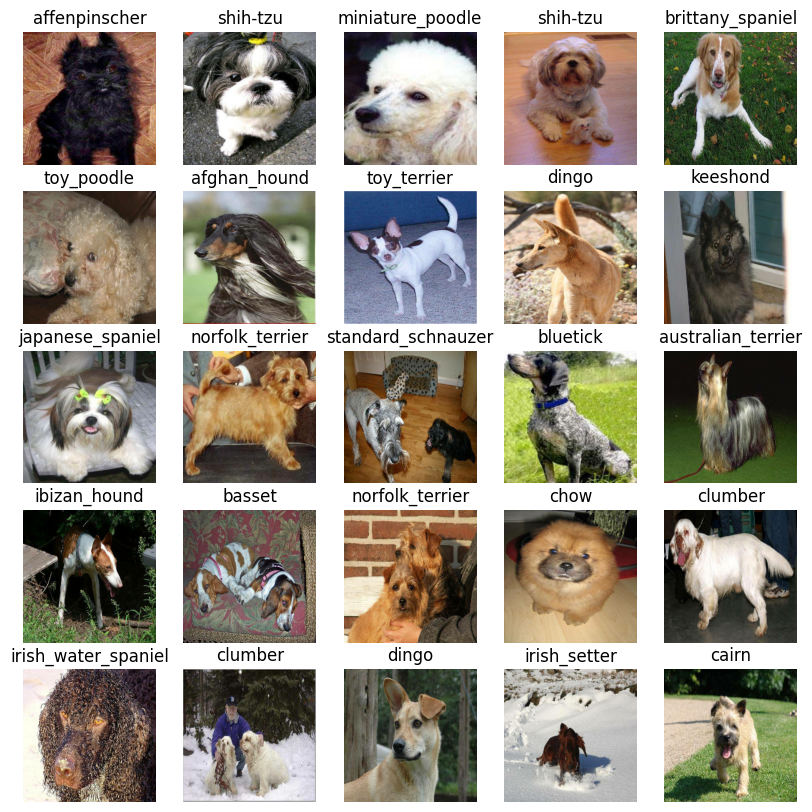

In [ ]:
## Let;s visualize our data in validation set
val_images, val_labels = next(train_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## ***Building a Model***

Before we build a model there a few things we must define.
* The input shape (our image shape in form of tensors) to our model. (defining the input).
* The output shape (our image label, in form of tensors) of our model. (defining the output)
* The URL of the model we want to use. (defining the URL)
Everything will be in Tensorflow hub, "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1")

This steps is neccessary in every machine learning model you are building. either from scrach or from url. (url to save time)

Now we've got input, output and model ready to go,
let's put them together into a Keras deep learning model.
in view of this let's create a function which:

* Takes the input shape, output shape and the model we've choosing as parameters.
* Define the laters in a keras model in sequencial fashion (i.e, do this first, then this, then that)
* Compile the model (i.e, in that it should be evaluated and improved)
* Build the model (tell the model the input shape it'll geeting)
* Return the model.

All of our steps (above) can be found here:  https://www.tensorflow.org/guide/keras/overview

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = ([None, IMG_SIZE, IMG_SIZE, 3])  # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)  # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1"

In [ ]:
import tf_keras as keras
from tf_keras import layers

# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  input_layer = hub.KerasLayer(MODEL_URL) # Layer 1 (input layer)
  output_layer = keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)

  ## Create the sequential model with the layers.
  model = keras.Sequential([
      input_layer,
      output_layer
  ])

  # Compile the model
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [ ]:
# Call create_model with the correct arguments
model = create_model()
model.summary()

Building model with: https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              5330564   
                                                                 
 dense (Dense)               (None, 120)               120120    
                                                                 
Total params: 5450684 (20.79 MB)
Trainable params: 120120 (469.22 KB)
Non-trainable params: 5330564 (20.33 MB)
_________________________________________________________________


## Create callback

Callback are helper functions a model can use during training to do such things as save it's progress, check it's progress or stop it's training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our model and another for early stopping which our model from training for too long.

## TensorBoard Callback

To set up a TensorBoard Callback we need to do 3 things

!. Load the Tensorboad extension
2. Create a Tensorboad callback, which is able to save logs to a directory and pass it to our models 'fit'() function.
3. Visualize our model training logs with the %tensorboard' magic function (To be done after model training)

In [ ]:
## Load TensoeBoard notewbook extention
%load_ext tensorboard

In [ ]:
import datetime

## Create a function to build a tensorboard callback
def create_tensorboard_callback():
  ## Create a log directory for storing tensorboad logs.
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        ## Make it so the logs get tracked whenever we run an experiement.
                        datetime.datetime.now().strftime("%Y%m%d=%H%M%S"))
  return keras.callbacks.TensorBoard(logdir)

## Early Stoping callback..
Early stoping elps stop our model from overfitting by stopping if a certain evaluation metrics stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [ ]:
## Create early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                               patience=3)

## Training a model(on subset of data)

Our first model is only going to train on 1000 images, to make everything is working.

In [ ]:
NUM_EPOCHS = 83  # @param {type: "slider", min: 10, max: 100}

In [ ]:
## Check to make sure we're still runing on a GPU
print("GPU", "available (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!)


Let's create a function which Trains our model.

    * Create a model using create_model()
    * Set up a tensorBoard callback using create_tensorboard_callback().
    * Call the fit() function on our model passing it the training data, validation data, number of epochs to train for('NUM_EPOCHS')
    and the callbacks we will like to use.
    * Return the model.

In [ ]:
from tf_keras.callbacks import TensorBoard, EarlyStopping

In [ ]:
 # Create a tensorboard callback
tensorboard = TensorBoard(log_dir='./logs')

    # Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss')

In [ ]:

## Create early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                               patience=3)

## Build a function to train and return a train model.
def model_create():
  """
  Train a given and return the trained version.
  """
  ## Create a model
  model = create_model()

  ## Fit the model to the data passing it the callback we created.
  model.fit(
        train_data,
        epochs=10,
        validation_data=val_data,
        validation_freq=1,
        callbacks=[tensorboard, early_stopping])

   # Return the fitted model
  return model

In [ ]:
## Fit the model to the data
model = model_create()

Building model with: https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1
Epoch 1/10
25/25 [==============================] - 101s 4s/step - loss: 4.7798 - accuracy: 0.0237 - val_loss: 4.7742 - val_accuracy: 0.0850
Epoch 2/10
25/25 [==============================] - 5s 182ms/step - loss: 4.7567 - accuracy: 0.1538 - val_loss: 4.7569 - val_accuracy: 0.1650
Epoch 3/10
25/25 [==============================] - 3s 132ms/step - loss: 4.7346 - accuracy: 0.2537 - val_loss: 4.7396 - val_accuracy: 0.1900
Epoch 4/10
25/25 [==============================] - 4s 155ms/step - loss: 4.7126 - accuracy: 0.3375 - val_loss: 4.7223 - val_accuracy: 0.2350
Epoch 5/10
25/25 [==============================] - 5s 208ms/step - loss: 4.6905 - accuracy: 0.4000 - val_loss: 4.7048 - val_accuracy: 0.2900
Epoch 6/10
25/25 [==============================] - 4s 154ms/step - loss: 4.6685 - accuracy: 0.4450 - val_loss: 4.6877 - val_accuracy: 0.3250
Epoch 7/10
25/25 [========================

It looks like our model is overfitting because it performing far better on the training data set than the validation dataset.
What are some ways to prevent model overfitting in deep learning neurak networks?

**NOTE** Overfitting to begin with is good thing, it means our model is learning!!!

## CHECKING THE TENSORBOARD LOG
The TensorBoard magic function (%tensorboard) will access the log directory we created earlier and visualize it's contents.

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

## Making and Evaluatingv Predicitions using a Trained Model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
## Make predictions on the validation data (not use to train on)
predictions = model.predict(val_data, verbose=1) ## Verbose is just like saying 'Hey when making your predictions show me your progress'.
predictions

7/7 [==============================] - 2s 99ms/step


array([[0.00888542, 0.00822541, 0.00883824, ..., 0.00819595, 0.00782228,
        0.00914334],
       [0.00988708, 0.00867627, 0.00820726, ..., 0.00825688, 0.00761588,
        0.00870816],
       [0.00803475, 0.00874452, 0.00885715, ..., 0.0079563 , 0.00838774,
        0.00894268],
       ...,
       [0.00848729, 0.00912552, 0.00806217, ..., 0.00794101, 0.00832023,
        0.00883885],
       [0.00871721, 0.00834499, 0.00891369, ..., 0.00821283, 0.00825122,
        0.00873578],
       [0.00804029, 0.00865701, 0.00840395, ..., 0.00812458, 0.00825197,
        0.00856436]], dtype=float32)

In [ ]:
predictions[0]

array([0.00888542, 0.00822541, 0.00883824, 0.00812959, 0.00823415,
       0.00725724, 0.00929166, 0.00867375, 0.00905405, 0.00822107,
       0.00864437, 0.00860508, 0.00809009, 0.00846539, 0.00867503,
       0.00778785, 0.00764251, 0.01021122, 0.0080279 , 0.0085646 ,
       0.0089844 , 0.00818821, 0.00762498, 0.00789254, 0.0077473 ,
       0.00836783, 0.01057078, 0.00850117, 0.0090265 , 0.00811413,
       0.00806996, 0.00838495, 0.0076628 , 0.00847311, 0.00786901,
       0.00781045, 0.0082388 , 0.009744  , 0.008203  , 0.00801855,
       0.00822465, 0.00724029, 0.0088377 , 0.00802992, 0.00768647,
       0.00740264, 0.00752394, 0.00800195, 0.00781287, 0.00831878,
       0.00816682, 0.00692119, 0.00875107, 0.00848846, 0.00811436,
       0.00842463, 0.00853699, 0.00932641, 0.00802812, 0.00976157,
       0.00796368, 0.00813406, 0.00880955, 0.0071277 , 0.00804149,
       0.00788532, 0.00847781, 0.00836401, 0.00896139, 0.00869379,
       0.00912948, 0.00859464, 0.0076861 , 0.00930923, 0.00786

This is an associated probability to the likeliness of what our model things the image is. So the above prediction[0] has a probability value for every single label.


In [ ]:
## Let's sum up all of this to see if it'll be very close to 1 or = 1.
np.sum(predictions[0])

np.float32(1.0)

In [ ]:
## Let's see prediction 1..
np.sum(predictions[1])

np.float32(0.99999994)

This why will apply softmax function in code 42 line 11. As we dealing with large dataset. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0 , 1).. Remember, all that softmax is doing is taking our 1280 array of output numbers and turning or changing it into array of numbers as seen above in predictions[0] result.

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
 ## Let's make our 1st prediction
index = 42
print(predictions[index])
print(f"Max value (probabilyt of prediction): {np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[0.00855616 0.00810851 0.00852428 0.00844232 0.00852917 0.00733398
 0.00851757 0.00948133 0.01010693 0.01023686 0.00869553 0.00886728
 0.00796889 0.00863542 0.0093588  0.00879177 0.00782985 0.00913671
 0.00784906 0.00885818 0.00833453 0.00876352 0.00726207 0.00790069
 0.00857672 0.00797325 0.00839156 0.00839605 0.00929554 0.00815567
 0.00811524 0.00838759 0.00811046 0.00843585 0.00770748 0.00744403
 0.00816328 0.00814231 0.0083028  0.01058961 0.00817394 0.00744816
 0.00934703 0.00805411 0.00758766 0.00734305 0.00738778 0.00787037
 0.007357   0.00853771 0.00811708 0.00684822 0.0085347  0.00900788
 0.00833252 0.008123   0.00885085 0.00915547 0.00803995 0.00901156
 0.00841634 0.00843808 0.00843863 0.00706469 0.00785006 0.00777577
 0.00842268 0.00928295 0.00905667 0.00846078 0.00842924 0.00869389
 0.00789427 0.00922655 0.0077308  0.00880034 0.00801341 0.00850325
 0.00834389 0.00775438 0.00808599 0.00774293 0.00832293 0.00811289
 0.00868119 0.00841338 0.00816294 0.00759087 0.00864028 0.0088

In [ ]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to able to it at scale.

And it would even better if we could see the image the prediction is been made on!

**NOTE**: Prediction probailities is also known as confidence level.

In [ ]:
## Now let's turn prediction probabilities into their respective label (easier to underdtand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

  ## get a predicted label based on array of prediction probabilities
  pred_label = get_pred_label(predictions[81])

Since our validation data is still in a batch dataset, i.e

(val_data
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>.

we have to unbactchify it to make predictions on the validation images and then compare those predictions to the validation label (truth labels)

In [ ]:
## Create a function to unbatch a batch dataset.
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images_ =[]
  labels_ =[]
  ## Loop through unbatch data
  for image, label in val_data.unbatch().as_numpy_iterator():
   images_.append(image)
   labels_.append(unique_breeds[np.argmax(label)])

  return images_, labels_ # Fixed: Indentation corrected

## Unbachify the validation data
val_images, val_labels = unbatchify(val_data)

val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we have got ways to get:
*Prediction probabilities,
*Validatiob Labels (truth label)
*Validation images

Now let's make some functions to make these all a bit more visualize.

We will create a function which:
* Takes an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label
* Plot the predicted label, its predicted probability, the truth label, and the target image on a single plot.

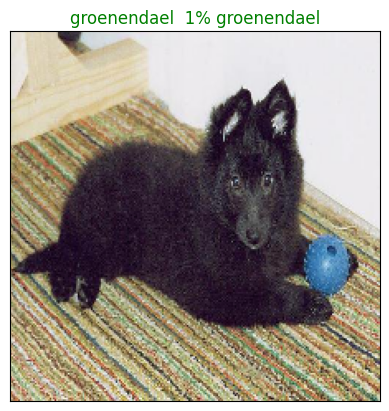

In [ ]:
def plot_pred(predictions_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  # Access the elements from the input parameters
  pred_probs, true_label, image = predictions_probabilities[n], labels[n], images[n]

  ## Get the prediction label using the get_pred_label function
  pred_label = get_pred_label(pred_probs)

  ## Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  ## Change the color of the title depending on if the prediction is right or wrong.
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  ## Change plot title to be predicted, probability of prediction with true label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                   np.max(pred_probs)*100,
                                   true_label),
                                   color=color)

# Call the plot_pred function with the predictions, val_labels, and val_images
plot_pred(predictions_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77) # Example: Display the first prediction

Now that we've got one function to visulaize our model top prediction, let's make another to view our model's top 10 predictions.

This function will.

* Take an input of prediction probabilities array and a ground truth array and an integer.
* Fine the prediction using get_pred_label()
* Fine the Top 10:
      
      >Prediction probabilities indexes
      >Prediction probabilities values
      >Prediction labels
* Plot the Top 10 prediction probability values and labels, coloring the True label green.

In [ ]:
def plot_pred_conf(predictions_probabilities, labels, n=1):
  """
  Plot the Top 10 highest prediction confidences, along with the truth label for sample n.
  """
  pred_probs, true_label = predictions_probabilities[n], labels[n] # Changed: label to labels and index to n to match the function input

  ## Get the prediction label
  pred_label = get_pred_label(pred_probs)

  ## Fine the top 10 prediction confidence indexes.
  top_10_pred_indexes = pred_probs.argsort()[-10:][::-1] # Changed: tpp_10_indexes to top_10_pred_indexes

  ## Fine top 10 prediction confidence values
  top_10_pred_values = pred_probs[top_10_pred_indexes] # Changed: top_10_pred_value to top_10_pred_values

  ## Fine the top prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  ## Set up plot.
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values, # Changed: top_10_pred_values
                     color="Red")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels, # Changed: label to labels
             rotation="vertical")
  ## Change color of true lable
  if np.isin(true_label, top_10_pred_labels): # Changed: true_labels to true_label
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("Green") # Changed: true_labels to true_label
  else:
      pass

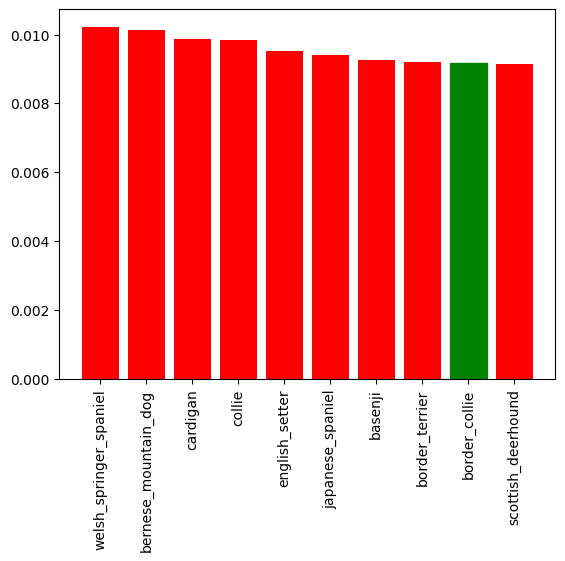

In [ ]:
plot_pred_conf(predictions_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to help visualize our predictions and evaluate our models, let's check out some few others.

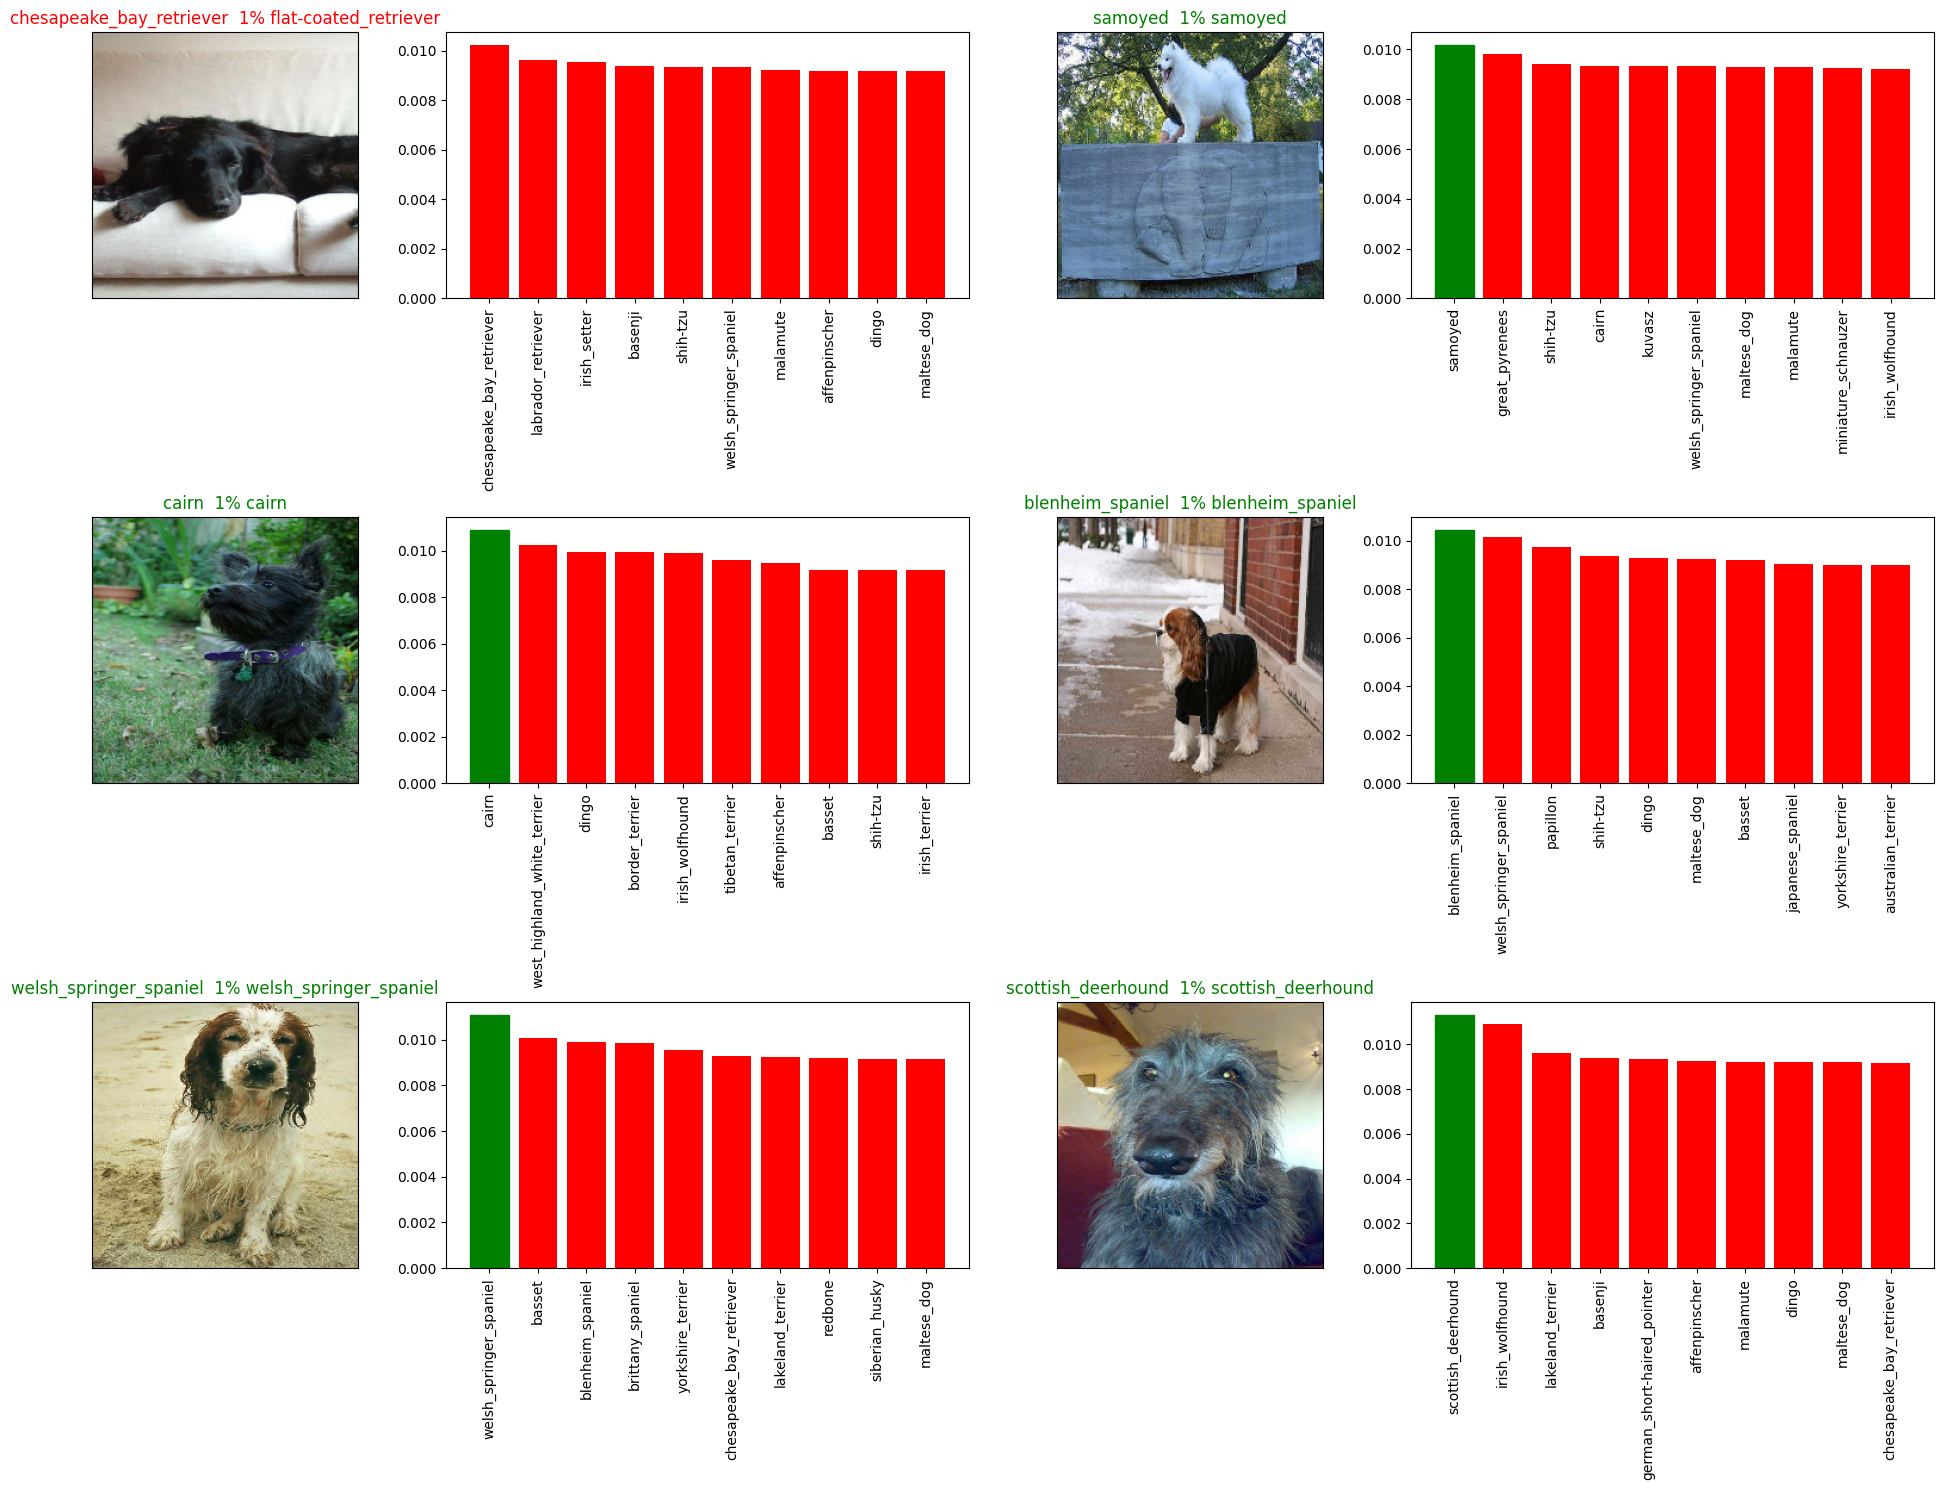

In [ ]:
## Let's check out a few predictions and their different values.
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

**CHALLENGE**: How would you create a Confusion matrix with our Model Predictions and true labels.


^**Saving and Loading a Trained Model**

In [ ]:
## Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a giving model in a models directory and appends a suffix (string) to the filenmae
  """
  ## Create a model directory pathname with current time.
  modeldir_path = os.path.join("drive/MyDrive/Dog Vision/Models",
                             datetime.datetime.now().strftime("%Y%m%d-%H%m%s"))
  model_path = modeldir_path + "_" + suffix + ".h5" ## .h5 or HDF5 saves format of a model.
  print(f"Saving model to: {model_path}....")
  model.save(model_path)
  return model_path


In [ ]:
## Create a function to load a Trained Model
def load_model(model_path):
  """
  load a trained model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = keras.models.load_model(model_path,
                                  custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to Load and save trained models, let's make sure they work.

In [ ]:
## Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")


Saving model to: drive/MyDrive/Dog Vision/Models/20250429-20041745959118_1000-images-mobilenetv2-Adam.h5....


/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/Dog Vision/Models/20250429-20041745959118_1000-images-mobilenetv2-Adam.h5'

In [ ]:
## Load a Trained model.
loaded_1000_images_model = load_model("drive/MyDrive/Dog Vision/Models/20250424-06041745474989_1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/Models/20250424-06041745474989_1000-images-mobilenetv2-Adam.h5


In [ ]:
## Evaluate the pre-saved model
model.evaluate(val_data) ## This our model before saving it.

7/7 [==============================] - 1s 93ms/step - loss: 4.6176 - accuracy: 0.3350


[4.617638111114502, 0.33500000834465027]

In [ ]:
## Evaluate the Loaded model
loaded_1000_images_model.evaluate(val_data) ## This our model after saving it.

7/7 [==============================] - 2s 97ms/step - loss: 4.6188 - accuracy: 0.3700


[4.6187567710876465, 0.3700000047683716]

**Training on a Multiples of Dog Images Model(on the Full Dataset)**



In [ ]:
## Let's recall our image dataset again .
len(x), len(y) ## Y is our labels and x is the training data.

(10222, 10222)

In [ ]:
## Create a data batch with the full dataset
full_data = create_data_batches(x, y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
## Create a model for full model
full_model = create_model()

Building model with: https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1


In [ ]:
## Create a full model callback
full_model_tensorboard = create_tensorboard_callback() ## This function helps us to track the performance of our model and compared it to others.
## There's no validation set when training on all the data, so we can't monitor validation accuracy.
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="accuracy",
                                                          patience=3)

In [ ]:
## Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/83
320/320 [==============================] - 50s 118ms/step - loss: 4.6733 - accuracy: 0.3864
Epoch 2/83
320/320 [==============================] - 37s 116ms/step - loss: 4.4405 - accuracy: 0.7031
Epoch 3/83
320/320 [==============================] - 39s 120ms/step - loss: 4.2129 - accuracy: 0.7658
Epoch 4/83
320/320 [==============================] - 38s 118ms/step - loss: 3.9899 - accuracy: 0.7933
Epoch 5/83
320/320 [==============================] - 38s 119ms/step - loss: 3.7719 - accuracy: 0.8059
Epoch 6/83
320/320 [==============================] - 37s 116ms/step - loss: 3.5590 - accuracy: 0.8226
Epoch 7/83
320/320 [==============================] - 38s 119ms/step - loss: 3.3516 - accuracy: 0.8332
Epoch 8/83
320/320 [==============================] - 38s 119ms/step - loss: 3.1500 - accuracy: 0.8371
Epoch 9/83
320/320 [==============================] - 38s 120ms/step - loss: 2.9548 - accuracy: 0.8439
Epoch 10/83
320/320 [==============================] - 37s 116ms/step - l

In [ ]:
save_model(full_model, suffix="all-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Vision/Models/20250429-21041745961097_all-images-mobilenetv2-Adam.h5....


'drive/MyDrive/Dog Vision/Models/20250429-21041745961097_all-images-mobilenetv2-Adam.h5'

In [ ]:
## Load in the full Model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/Models/20250428-06041745821400_1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/Models/20250428-06041745821400_1000-images-mobilenetv2-Adam.h5


**Making Predictions on test dataset**

Since our model has been trained on images in the form of tensor batches, to make predictions on the test data, we have to get it into the same format.

Luckly we created create_data_batches() which can take a list of filenames as input and covert them into tensor batches to make predictions on the test data.
We'll:
* Get the test image filename
* Convert the filename into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the predict() called our model

In [ ]:
## Load test images filenames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames =[test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e7b608110b0e29120d8740f37e85f3d0.jpg',
 'drive/MyDrive/Dog Vision/test/e57820007fcc2a07a5230177965a0f59.jpg',
 'drive/MyDrive/Dog Vision/test/dfdeddf3da8d52c211620eaabd82b773.jpg',
 'drive/MyDrive/Dog Vision/test/e219af838e1d6a18224eb9b478944778.jpg',
 'drive/MyDrive/Dog Vision/test/e265af5e8f446888c6e7ec31f803d63e.jpg',
 'drive/MyDrive/Dog Vision/test/debfa5cad80e35c510dff6ca29b94ca3.jpg',
 'drive/MyDrive/Dog Vision/test/e806a67a05289ac6de6831001664b81b.jpg',
 'drive/MyDrive/Dog Vision/test/dcc047e682db75bbcebdec2288192f1d.jpg',
 'drive/MyDrive/Dog Vision/test/e47de0441a48f2eff7c2faacd350ed06.jpg',
 'drive/MyDrive/Dog Vision/test/e61cd2626c01dd00117eca55fb099f5d.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
## Create a test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**NOTE**: Calling predict() on our full model, passing it to the test data will take a long time to run. (about an hour or so). The reason been that we already have over 10,000 images.

In [ ]:
## Make predictions on the test data batch using the laoded full model.
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 111s 340ms/step


In [ ]:
## Save predictions (numpy array) to csv file (to access late)
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
## Laod predictions (numpy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

In [ ]:
## Let's take a look at the 1st 10 test predictions
test_predictions[:10]

array([[0.00881326, 0.0087085 , 0.00864004, ..., 0.00822776, 0.00751249,
        0.00901709],
       [0.00875214, 0.00855246, 0.00829272, ..., 0.00815723, 0.00824493,
        0.00944673],
       [0.00821122, 0.00904541, 0.01036607, ..., 0.00781236, 0.00748518,
        0.00896854],
       ...,
       [0.00811833, 0.00864376, 0.0088411 , ..., 0.0077147 , 0.00793231,
        0.0090614 ],
       [0.00867788, 0.00878693, 0.0086127 , ..., 0.00780773, 0.00797539,
        0.00858385],
       [0.00875593, 0.00932029, 0.00870619, ..., 0.00801772, 0.00797162,
        0.00900584]])

In [ ]:
## Let's take a look at the shape
test_predictions.shape

(10357, 120)

** Preparing Test Dataset Predictions for Kaggle **

Lokking at the kaggle sample submission, we found out that it want our model prediction probability output in DataFrame with an I.D and a column for each diffrent Dog breed. https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the our data in this format.           
We'll:

* Create a pandas DataFrame with an i.d as well as a column for each dog breed.
* Add data to the i.d column by exracting the test image I.D's from their filepaths.
* Add data (prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a csv to submit it to kaggle.

In [ ]:
import pandas as pd
## Create a Pandas dataframe with Empty column
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
## Apend test image id's to the prediction dataframe.
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["ids"] = test_ids

In [ ]:
preds_df.head()

id affenpinscher afghan_hound african_hunting_dog airedale  \
0  NaN           NaN          NaN                 NaN      NaN   
1  NaN           NaN          NaN                 NaN      NaN   
2  NaN           NaN          NaN                 NaN      NaN   
3  NaN           NaN          NaN                 NaN      NaN   
4  NaN           NaN          NaN                 NaN      NaN   

  american_staffordshire_terrier appenzeller australian_terrier basenji  \
0                            NaN         NaN                NaN     NaN   
1                            NaN         NaN                NaN     NaN   
2                            NaN         NaN                NaN     NaN   
3                            NaN         NaN                NaN     NaN   
4                            NaN         NaN                NaN     NaN   

  basset  ... toy_terrier vizsla walker_hound weimaraner  \
0    NaN  ...         NaN    NaN          NaN        NaN   
1    NaN  ...         NaN    NaN          NaN        NaN   
2    NaN  ...         NaN    NaN          NaN        NaN   
3    NaN  ...         NaN    NaN          NaN        NaN   
4    NaN  ...         NaN    NaN          NaN        NaN   

  welsh_springer_spaniel west_highland_white_terrier whippet  \
0                    NaN                         NaN     NaN   
1                    NaN                         NaN     NaN   
2                    NaN                         NaN     NaN   
3                    NaN                         NaN     NaN   
4                    NaN                         NaN     NaN   

  wire-haired_fox_terrier yorkshire_terrier                               ids  
0                     NaN               NaN  e7b608110b0e29120d8740f37e85f3d0  
1                     NaN               NaN  e57820007fcc2a07a5230177965a0f59  
2                     NaN               NaN  dfdeddf3da8d52c211620eaabd82b773  
3                     NaN               NaN  e219af838e1d6a18224eb9b478944778  
4                     NaN               NaN  e265af5e8f446888c6e7ec31f803d63e  

[5 rows x 122 columns]

In [ ]:
## Nw we need append. Let;s add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  african_hunting_dog  airedale  \
0  NaN       0.008813      0.008709             0.008640  0.008503   
1  NaN       0.008752      0.008552             0.008293  0.008364   
2  NaN       0.008211      0.009045             0.010366  0.007800   
3  NaN       0.008582      0.008568             0.008553  0.008756   
4  NaN       0.008232      0.008987             0.008797  0.008752   

   american_staffordshire_terrier  appenzeller  australian_terrier   basenji  \
0                        0.008270     0.007794            0.008796  0.009529   
1                        0.008591     0.007451            0.008444  0.009346   
2                        0.008503     0.008146            0.008883  0.010498   
3                        0.009760     0.007482            0.008322  0.010073   
4                        0.008247     0.007461            0.008869  0.009503   

     basset  ...  toy_terrier    vizsla  walker_hound  weimaraner  \
0  0.008325  ...     0.007346  0.008069      0.008960    0.008346   
1  0.009808  ...     0.007376  0.007789      0.009054    0.007996   
2  0.008277  ...     0.007506  0.007481      0.008771    0.007496   
3  0.009324  ...     0.007855  0.008316      0.008748    0.008252   
4  0.008764  ...     0.007856  0.007462      0.008537    0.007759   

   welsh_springer_spaniel  west_highland_white_terrier   whippet  \
0                0.008534                     0.008132  0.008228   
1                0.011105                     0.008442  0.008157   
2                0.009079                     0.007790  0.007812   
3                0.008911                     0.008493  0.009108   
4                0.010765                     0.007973  0.008074   

   wire-haired_fox_terrier  yorkshire_terrier  \
0                 0.007512           0.009017   
1                 0.008245           0.009447   
2                 0.007485           0.008969   
3                 0.007829           0.008509   
4                 0.007642           0.009277   

                                ids  
0  e7b608110b0e29120d8740f37e85f3d0  
1  e57820007fcc2a07a5230177965a0f59  
2  dfdeddf3da8d52c211620eaabd82b773  
3  e219af838e1d6a18224eb9b478944778  
4  e265af5e8f446888c6e7ec31f803d63e  

[5 rows x 122 columns]

The above result shows what kaggle really want and here we are. ☝

In [ ]:
## Let's turn it to csv so as to submit it to kaggle
preds_df.to_csv("drive/MyDrive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv", index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:

* Get the filepath of our own images
* Turn the filepath into data batches using create_data_batches(). And since our custom images won't have labels, we'll set the test_data() parameter to true.
* Pass the custom image data batch to our model predict() method.
* Then we covert the prediction output probabilitues to prediction labels.
* finally we compare the predicted labels to custom images

In [ ]:
## Let's get the custom image filepath.. setting it up
custom_path = "drive/MyDrive/Dog Vision/My-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)
if os.path.isfile(os.path.join(custom_path, fname))
  and not fname.startswith('.')]
(custom_path)

'drive/MyDrive/Dog Vision/My-dog-photos/'

In [ ]:
custom_image_paths

['drive/MyDrive/Dog Vision/My-dog-photos/joe-caione-qO-PIF84Vxg-unsplash.jpg',
 'drive/MyDrive/Dog Vision/My-dog-photos/oscar-sutton-yihlaRCCvd4-unsplash.jpg',
 'drive/MyDrive/Dog Vision/My-dog-photos/baptist-standaert-mx0DEnfYxic-unsplash.jpg']

In [ ]:
## Turn custom images into batch dataset
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
## Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
custom_preds.shape
## we have 5 images and 120 prediction probabilities on wach one.

(3, 120)

In [ ]:
## Get custom image prediction labels
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['lakeland_terrier', 'redbone', 'cardigan']

In [ ]:
## Get custom images our unbachify() function won't work siuce there aren't labels
custom_images =[]

## Loop through unbached data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

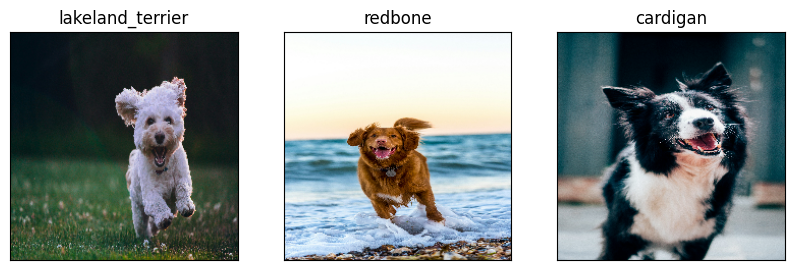

In [ ]:
## Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)